# Data Analysis and Imbalance Check

Once the initial data processing was complete, I moved on to analyzing the dataset. For this purpose, I created a new script, `02_check_imbalance.py`, located in the `src/data_processing/` folder.


### Step 1: Initial Data Visualization


My first step was to see how my data was distributed on a map. I used the **Matplotlib** and **Cartopy** libraries to plot all 57,000 images as points on a world map. The initial overview of the general distribution looked like this:


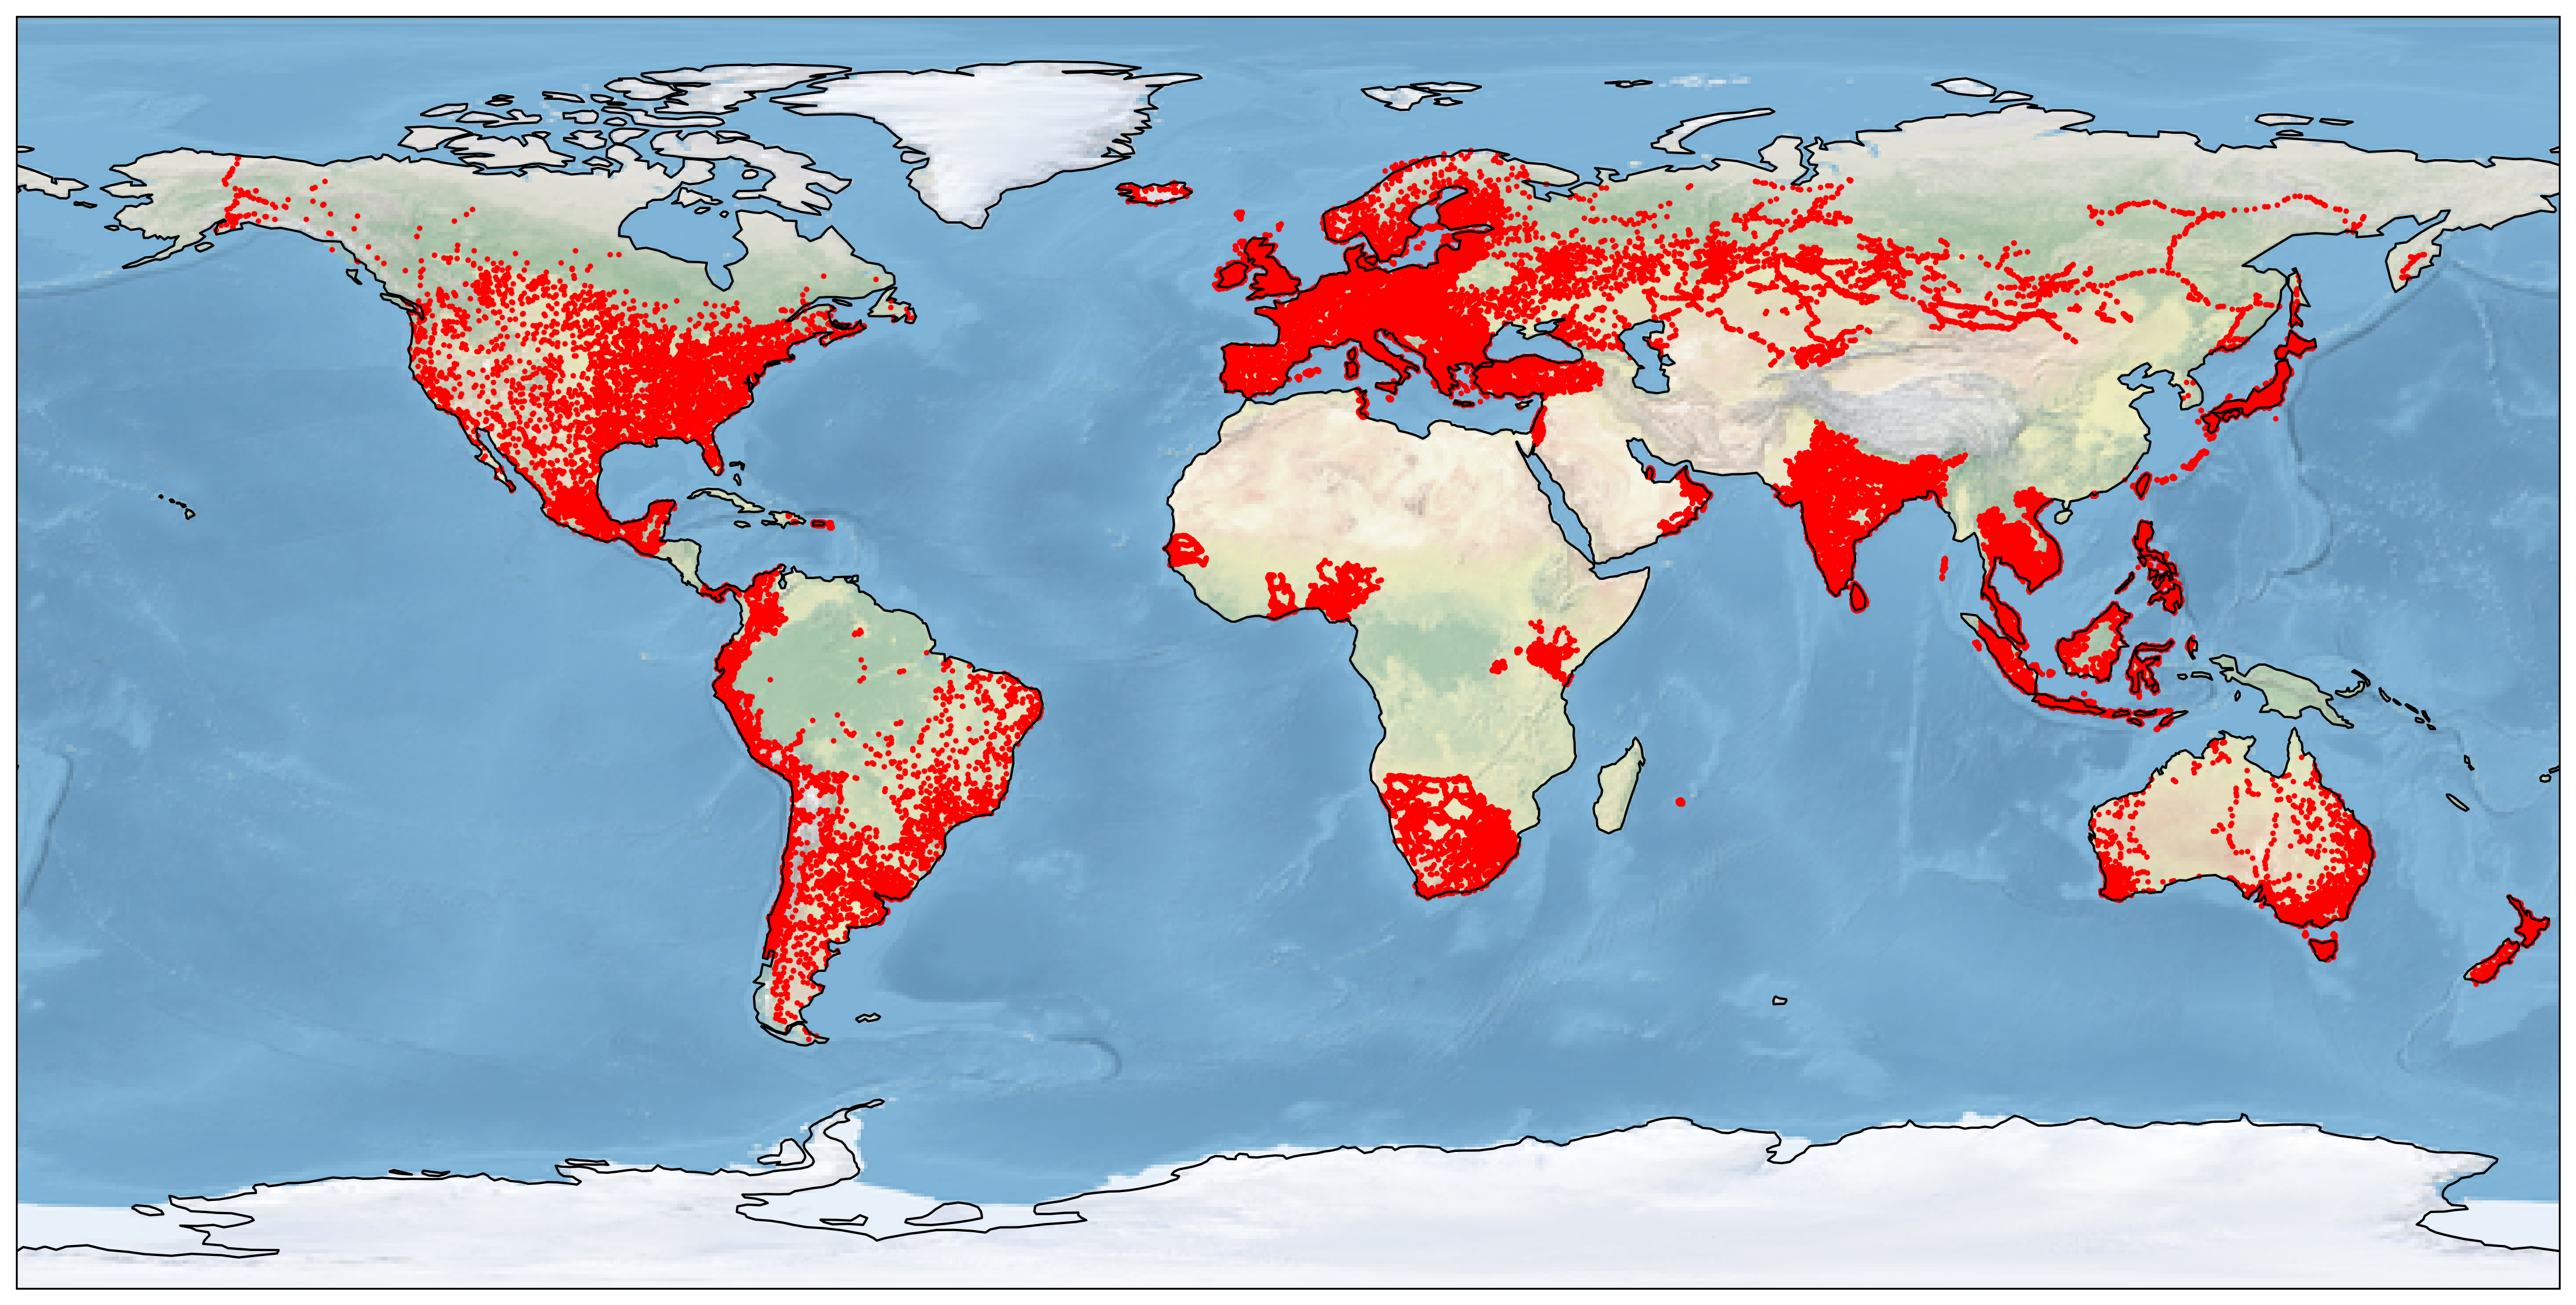

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

metadata = pd.read_csv('../data/metadata_final.csv')

plt.figure(figsize=(20, 10), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

lat = metadata['latitude']
lon = metadata['longitude']
plt.scatter(lon, lat, s=2, color='red', alpha=1, transform=ccrs.PlateCarree())

plt.show()

### Step 2: Refining the Super-Region Split


Next, I visualized the same data, but this time I colored the points according to their assigned super-region. This map immediately revealed some inconsistencies. I noticed that my original rules weren't perfect—some countries were assigned to the wrong groups, and the **"Rare Regions"** category was too large and included locations that could be better classified.

After correcting the rules in my `region_map` dictionary, the distribution looked much more logical and geographically accurate:

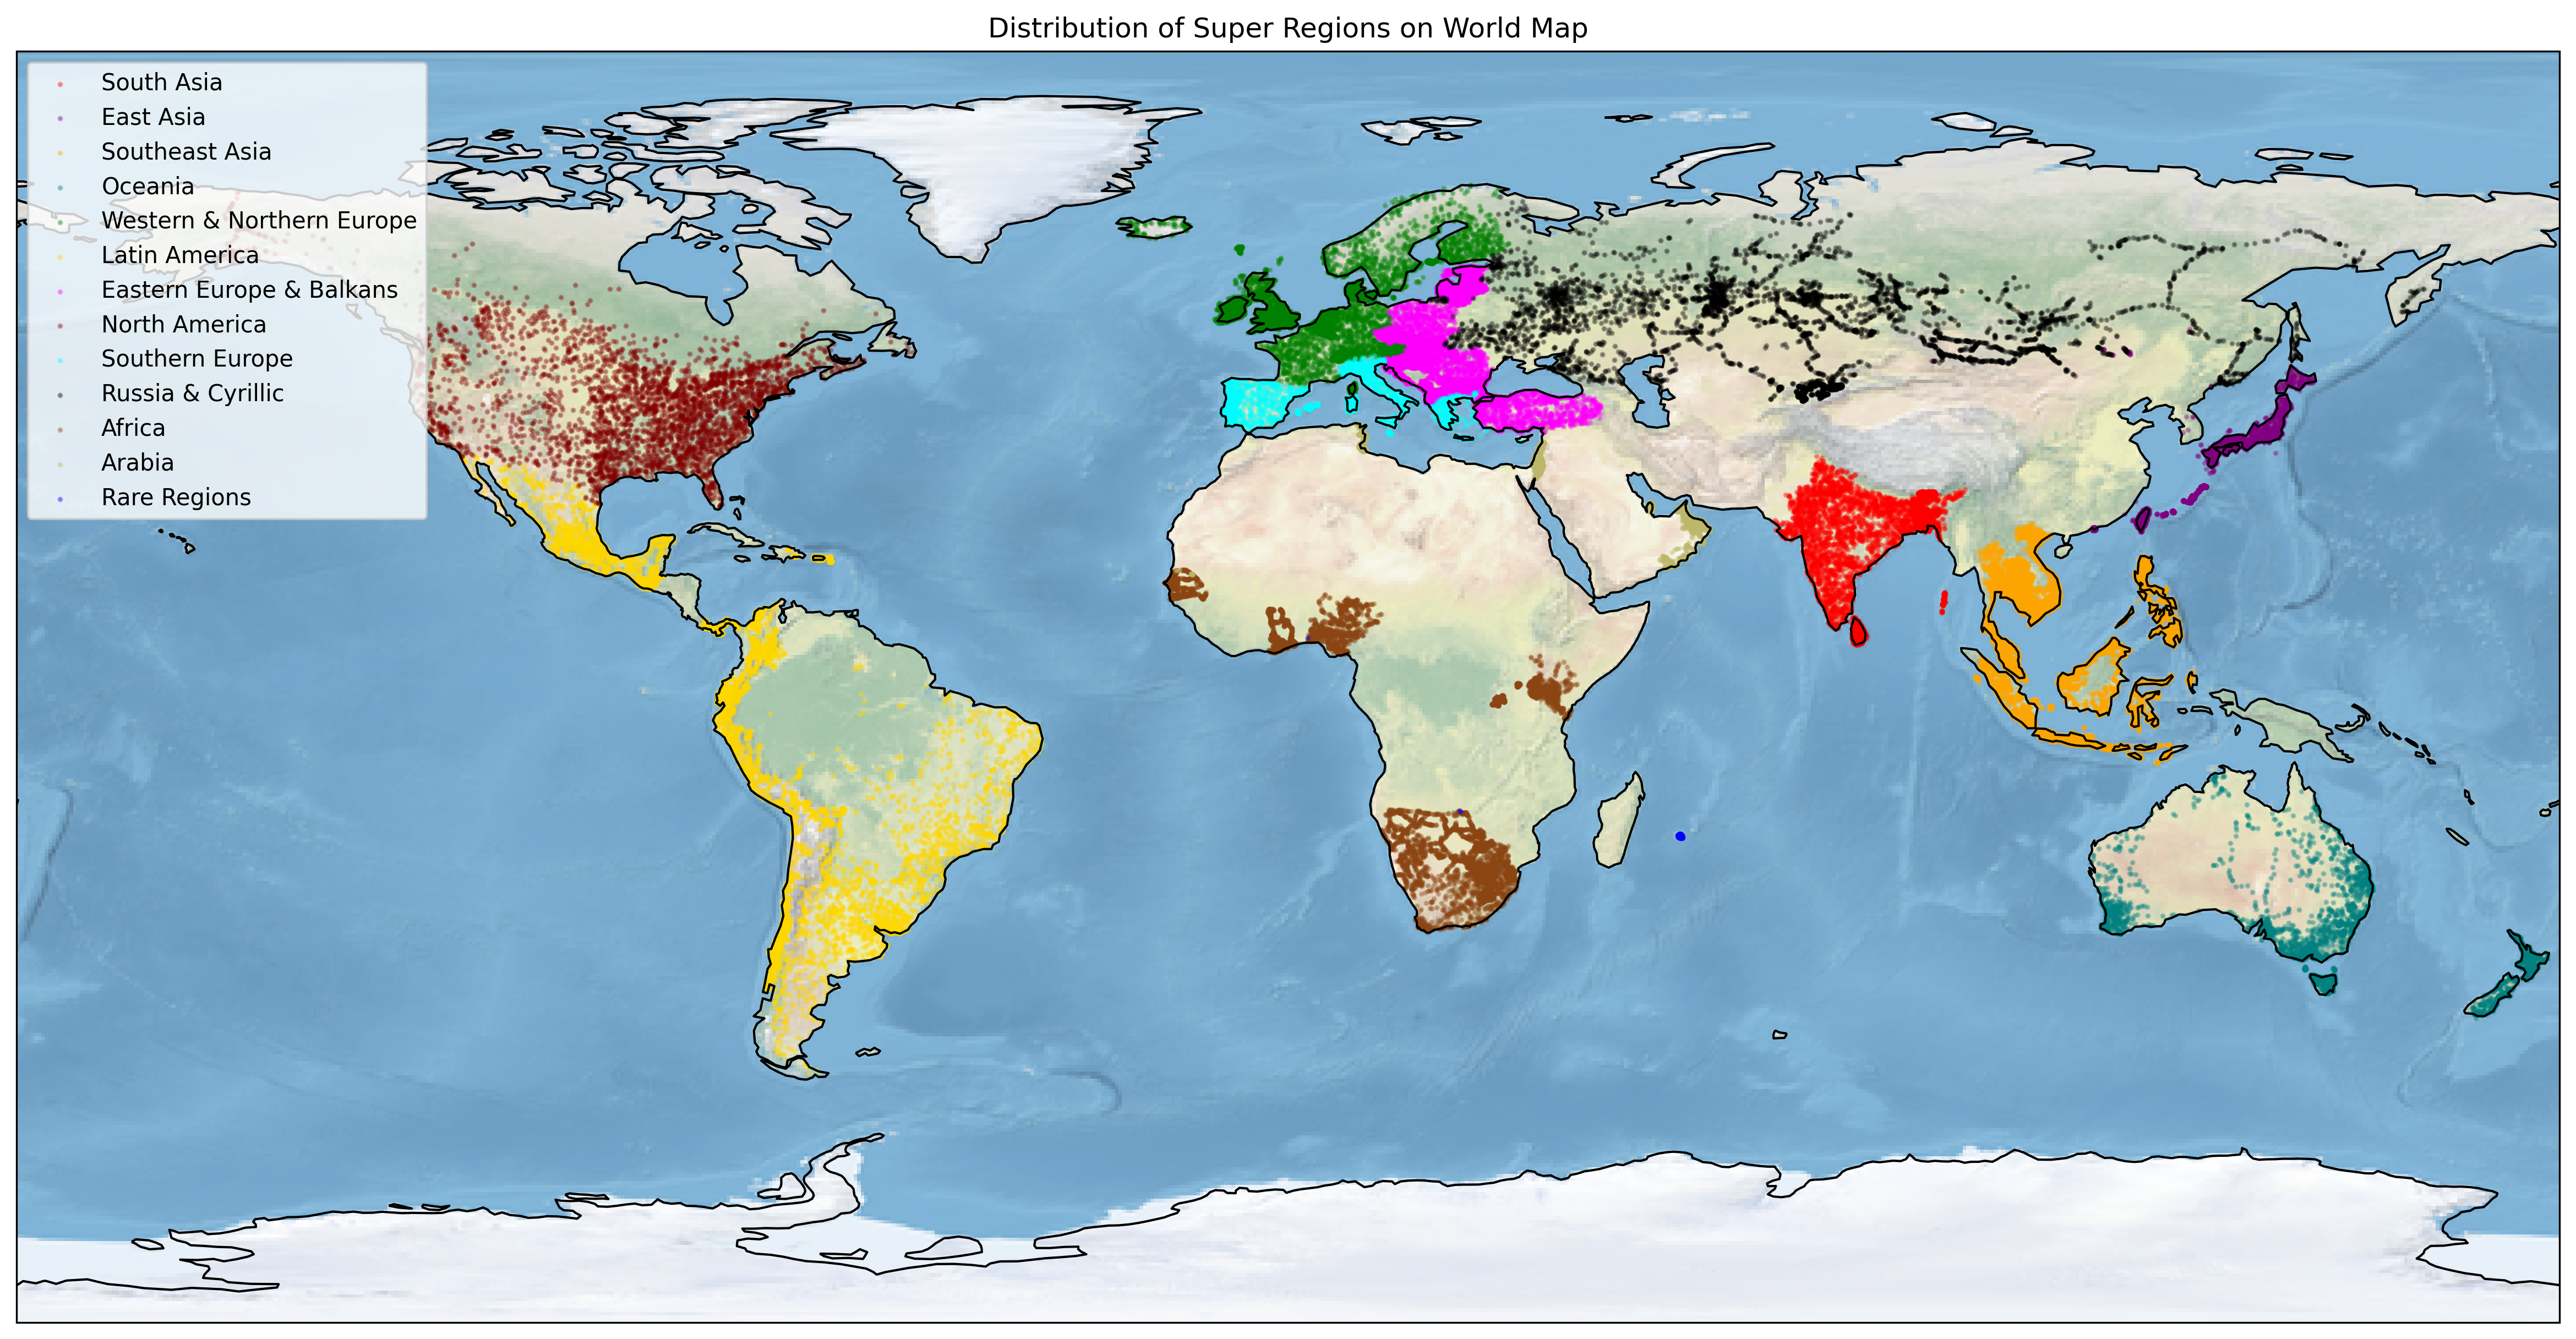

In [2]:
plt.figure(figsize=(20, 10), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

# South Asia
south_asia = metadata[metadata['superRegion'] == 'South Asia']
lat_south_asia = south_asia['latitude']
lon_south_asia = south_asia['longitude']
plt.scatter(lon_south_asia, lat_south_asia, s=2, color='red', alpha=0.3, transform=ccrs.PlateCarree())

# East Asia
east_asia = metadata[metadata['superRegion'] == 'East Asia']
lat_east_asia = east_asia['latitude']
lon_east_asia = east_asia['longitude']
plt.scatter(lon_east_asia, lat_east_asia, s=2, color='purple', alpha=0.3, transform=ccrs.PlateCarree())

# Southeast Asia
southeast_asia = metadata[metadata['superRegion'] == 'Southeast Asia']
lat_southeast_asia = southeast_asia['latitude']
lon_southeast_asia = southeast_asia['longitude']
plt.scatter(lon_southeast_asia, lat_southeast_asia, s=2, color='orange', alpha=0.3, transform=ccrs.PlateCarree())

# Oceania
oceania = metadata[metadata['superRegion'] == 'Oceania']
lat_oceania = oceania['latitude']
lon_oceania = oceania['longitude']
plt.scatter(lon_oceania, lat_oceania, s=2, color='teal', alpha=0.3, transform=ccrs.PlateCarree())

# Western & Northern Europe
western_europe = metadata[metadata['superRegion'] == 'Western & Northern Europe']
lat_western_europe = western_europe['latitude']
lon_western_europe = western_europe['longitude']
plt.scatter(lon_western_europe, lat_western_europe, s=2, color='green', alpha=0.3, transform=ccrs.PlateCarree())

# Latin America
latin_america = metadata[metadata['superRegion'] == 'Latin America']
lat_latin_america = latin_america['latitude']
lon_latin_america = latin_america['longitude']
plt.scatter(lon_latin_america, lat_latin_america, s=2, color='gold', alpha=0.3, transform=ccrs.PlateCarree())

# Eastern Europe & Balkans
eastern_europe = metadata[metadata['superRegion'] == 'Eastern Europe & Balkans']
lat_eastern_europe = eastern_europe['latitude']
lon_eastern_europe = eastern_europe['longitude']
plt.scatter(lon_eastern_europe, lat_eastern_europe, s=2, color='magenta', alpha=0.3, transform=ccrs.PlateCarree())

# North America
north_america = metadata[metadata['superRegion'] == 'North America']
lat_north_america = north_america['latitude']
lon_north_america = north_america['longitude']
plt.scatter(lon_north_america, lat_north_america, s=2, color='maroon', alpha=0.3, transform=ccrs.PlateCarree())

# Southern Europe
southern_europe = metadata[metadata['superRegion'] == 'Southern Europe']
lat_southern_europe = southern_europe['latitude']
lon_southern_europe = southern_europe['longitude']
plt.scatter(lon_southern_europe, lat_southern_europe, s=2, color='cyan', alpha=0.3, transform=ccrs.PlateCarree())

# Russia & Cyrillic
russia_cyrillic = metadata[metadata['superRegion'] == 'Russia & Cyrillic']
lat_russia_cyrillic = russia_cyrillic['latitude']
lon_russia_cyrillic = russia_cyrillic['longitude']
plt.scatter(lon_russia_cyrillic, lat_russia_cyrillic, s=2, color='black', alpha=0.3,
            transform=ccrs.PlateCarree())

# Africa
africa = metadata[metadata['superRegion'] == 'Africa']
lat_africa = africa['latitude']
lon_africa = africa['longitude']
plt.scatter(lon_africa, lat_africa, s=2, color='saddlebrown', alpha=0.3, transform=ccrs.PlateCarree())

# Arabia
arabia = metadata[metadata['superRegion'] == 'Arabia']
lat_arabia = arabia['latitude']
lon_arabia = arabia['longitude']
plt.scatter(lon_arabia, lat_arabia, s=2, color='darkkhaki', alpha=0.3, transform=ccrs.PlateCarree())

# Rare Regions
rare_regions = metadata[metadata['superRegion'] == 'Rare Regions']
lat_rare_regions = rare_regions['latitude']
lon_rare_regions = rare_regions['longitude']
plt.scatter(lon_rare_regions, lat_rare_regions, s=2, color='blue', alpha=0.3, transform=ccrs.PlateCarree())

# legend
plt.title('Distribution of Super Regions on World Map')
plt.legend([
    'South Asia', 'East Asia', 'Southeast Asia', 'Oceania',
    'Western & Northern Europe', 'Latin America', 'Eastern Europe & Balkans',
    'North America', 'Southern Europe', 'Russia & Cyrillic',
    'Africa', 'Arabia', 'Rare Regions'
], loc='upper left')

plt.show()

During this process, I also encountered an interesting technical problem. It turned out that the official country code for **Namibia is 'NA'**. Unfortunately, the function for reading CSV files (`pd.read_csv`) treated this string as a missing value (`NaN`) by default, causing all photos from Namibia to be incorrectly placed in the "Rare Regions" category. I solved this by adding the **`keep_default_na=False`** argument to the function when loading the file.

### Step 3: Analyzing Class Imbalance

Once I was sure the regions were assigned correctly, I checked the balance of my dataset. I counted the number of images in each super-region to see which classes were over-represented and which were too rare. The results were as follows:
> * **Western & Northern Europe:** 7847
> * **Southeast Asia:** 7702
> * **Latin America:** 7628
> * **Eastern Europe & Balkans:** 7141
> * **Africa:** 6011
> * **Arabia:** 3889
> * **North America:** 3685
> * **South Asia:** 3555
> * **East Asia:** 3403
> * **Southern Europe:** 2642
> * **Oceania:** 1946
> * **Russia & Cyrillic:** 1100
> * **Rare Regions:** 595


This analysis clearly showed a class imbalance problem. For example, there are **over 7 times more images from Western & Northern Europe than from the entire "Russia & Cyrillic" region**. This is critical information because a model trained on such data would become biased and favor the more common regions.

### Step 4: Next Steps: Addressing the Imbalance Problem

To solve this problem, my next step is to **collect more data, especially for the under-represented regions**. I will focus on obtaining additional images for categories like "Russia & Cyrillic", "Oceania", and "Southern Europe" to create a more balanced dataset for training the model. The results were as follows:
> * **Southeast Asia:** 9750
> * **Africa:** 8449
> * **Western & Northern Europe:** 7847
> * **Latin America:** 7628
> * **Eastern Europe & Balkans:** 7141
> * **South Asia:** 5351
> * **Russia & Cyrillic:** 4821
> * **Arabia:** 4787
> * **North America:** 3685
> * **East Asia:** 3426
> * **Oceania:** 3395
> * **Southern Europe:** 2642
> * **Rare Regions:** 598

To get a clearer picture, I grouped these fine-grained regions into broader continental categories. This new perspective revealed the true imbalance in the dataset:
> * **Asia:** 18,527
> * **Europe:** 17,630
> * **Africa:** 13,236
> * **South America:** 7,628
> * **Russia & Cyrillic:** 4,821
> * **North America:** 3,685
> * **Oceania:** 3,395
> * **Rare Regions:** 598

This high-level view makes the problem much clearer. While Europe and Asia are very well-represented, other significant regions are lagging. It shows that I need to focus my efforts on gathering more data for **the Americas (especially North America), Oceania, and the Russia & Cyrillic region** to create a truly balanced and effective training dataset.